In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import time
import scipy.stats as st
from scipy.stats import linregress

#citipy to determine lat/lngs of cities
from citipy import citipy

# Import API Key
from api_keys import weather_api_key

#file to store cities output data
city_data = "city_data.csv"

#lat/Lng range
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#list for cities and list lat and lngs, use zip to combine
lat_lngs = [] 
cities = [] 

#random variation for lat lngs
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#acquire closest city from lat/lng combination with for loop
for lat_lngs in lat_lngs:
    city = citipy.nearest_city(lat_lngs[0], lat_lngs[1]).city_name
    
    #make unique values in cities list to avoid duplicates
    if city not in cities:
        cities.append(city)
#generate cities list
len(cities)


588

In [3]:
#generate lists for weather variables in cities

city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#use api call to gather current weather data and store data in created lists
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : namibe
Processing Record 2 of Set 1 : ereymentau
Processing Record 3 of Set 1 : kitob
City not found. Skipping...
Processing Record 4 of Set 1 : vila velha
Processing Record 5 of Set 1 : ostersund
Processing Record 6 of Set 1 : port alfred
Processing Record 7 of Set 1 : prince rupert
City not found. Skipping...
Processing Record 8 of Set 1 : martapura
Processing Record 9 of Set 1 : busselton
Processing Record 10 of Set 1 : kardailovo
Processing Record 11 of Set 1 : arteaga
Processing Record 12 of Set 1 : atuona
Processing Record 13 of Set 1 : yellowknife
Processing Record 14 of Set 1 : mount isa
Processing Record 15 of Set 1 : butaritari
Processing Record 16 of Set 1 : torbay
Processing Record 17 of Set 1 : borogontsy
Processing Record 18 of Set 1 : lethem
Processing Record 19 of Set 1 : bluff
Processing Record 20 of Set 1 : hobart
Processing Record 21 of Set 1 : zhangye
Processing Record 22 of Set 1

In [5]:
#generate dataframe with data
weather_df = pd.DataFrame({
    "City" : city_name_list,
    "Cloudiness" : cloudiness_list,
    "Country" : country_list,
    "Date" : date_list,
    "Humidity" : humidity_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp_list,
    "Wind Speed" : wind_speed_list
})

In [6]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mossamedes,0,AO,1626970311,58,-15.1961,12.1522,72.54,8.16
1,Ereymentau,0,KZ,1626970312,42,51.6199,73.1033,68.99,6.24
2,Kitob,0,UZ,1626970312,14,39.0843,66.8332,86.58,1.72
3,Vila Velha,75,BR,1626970312,70,-20.3297,-40.2925,75.96,12.66
4,Östersund,75,SE,1626970313,67,63.1792,14.6357,55.85,29.93
...,...,...,...,...,...,...,...,...,...
533,Cadiz,0,ES,1626970478,21,36.5000,-5.7500,99.12,11.32
534,Nadym,52,RU,1626970479,58,65.5333,72.5167,58.37,8.75
535,Westport,20,US,1626970479,55,41.1415,-73.3579,81.86,1.01
536,Zhuji,14,CN,1626970479,98,29.7188,120.2423,80.51,3.87


In [7]:
#save data to csv
weather_df.to_csv("Data/city_data.csv", index = False)

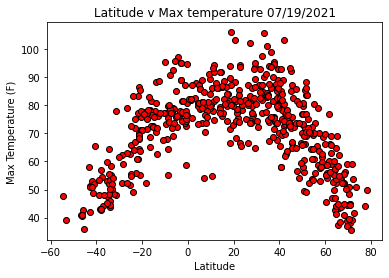

In [8]:
# Now to plot the data against one another to see if correlations exist to answer the question 'What is the weather like as we move towards the equator?'
# Temperature (F) vs. Latitude

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "red", edgecolor = "black")

#labels
plt.title('Latitude v Max temperature 07/19/2021')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#save png
plt.savefig("Images/Lat_v_Max_Temp")

Observation:

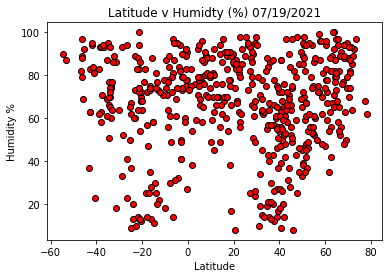

In [9]:
#Humidity (%) vs. Latitude
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "red", edgecolor = "black")

#labels
plt.title('Latitude v Humidty (%) 07/19/2021')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')

#save png
plt.savefig("Images/Lat_v_Humidity")

Observation: 

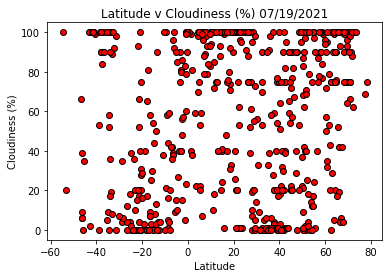

In [10]:
#Cloudiness (%) vs. Latitude
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "red", edgecolor = "black")

#labels
plt.title('Latitude v Cloudiness (%) 07/19/2021')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#save png
plt.savefig("Images/Lat_v_Cloudiness")

Observation:

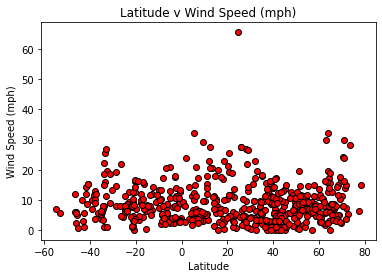

In [11]:
# Wind Speed (mph) vs. Latitude
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "red", edgecolor = "black")

#labels
plt.title('Latitude v Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#save png
plt.savefig("Images/Lat_v_Wind")

Observation:

In [12]:
#Northern Hemisphere and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"] >=0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

In [13]:
#Linear regression to analyze data points
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    return line_eq
#annotation for equation of line...currently not cooperating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15, color="red")

The r-squared is : -0.69


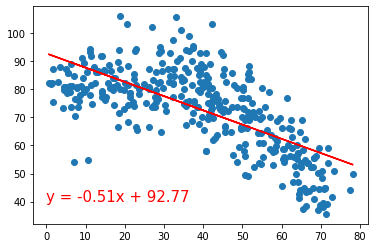

In [14]:
# N. Hemisphere: Max Temp v Latitude
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

annotate(equation, 0, 40)



Observation: 

The r-squared is : 0.82


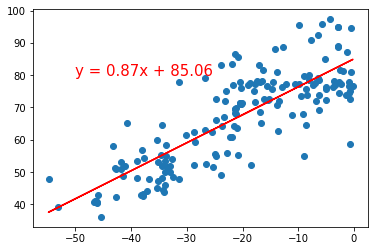

In [15]:
# S. Hemisphere: Max Temp v Latitude
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
annotate(equation, -50, 80)

Observation: 

The r-squared is : 0.0


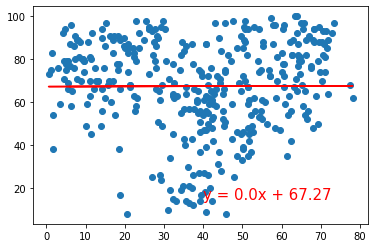

In [16]:
# N. Hemisphere: Humidity (%) v Latitude
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 40, 15)

Observation:

The r-squared is : -0.12


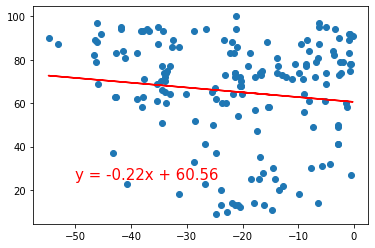

In [17]:
#S. Hemisphere: Humidty (%) v Latitude
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, -50, 25)

Observation:

The r-squared is : 0.0


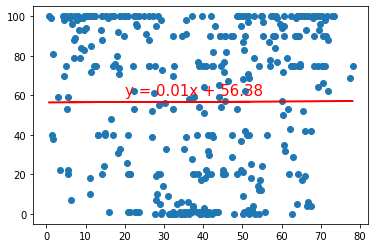

In [18]:
# N. Hemisphere: Cloudiness (%) v Latitude
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 20, 60)

Observation:

The r-squared is : -0.07


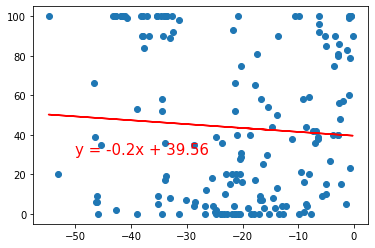

In [19]:
# S. Hemisphere: Cloudiness (%) v Latitude
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, -50, 30)

Observation: 

The r-squared is : -0.03


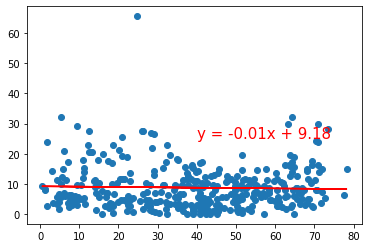

In [20]:
# N. Hemisphere: Wind Speed (mph) v Latitude
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 40, 25)

Observation: 

The r-squared is : -0.05


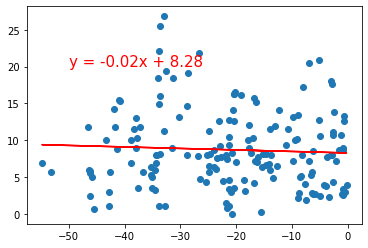

In [21]:
# S. Hemisphere: Wind Speed (mph) v Latitude
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, -50, 20)


Observation: